----------------------------------

# <span style="color:green"> 👨‍🏫 statistics <span style ="font-family:Papyrus;"> with python </span>
----------------------------------

<span style="background-color:#F5F5F5"> **🧪 강의 개요** <br> </span> 
- 데이터 분석 및 과학을 위한 핵심 통계지식을 학습합니다.  
- python 을 활용한 통계적 가설검증을 학습합니다.
- 회귀(예측), 분류(지도학습), 클러스터링(비지도학습) 에 대해 이해합니다.
- 실습에는 kaggle dataset 이 사용되었습니다.
- 모든 회차에서 강의내용 핵심요약을 진행합니다. 

<span style="background-color:#F5F5F5"> **🧪 커리큘럼** <br> </span> 
- 1회차: 표본분포, 신뢰구간, 정규분포 - 이론
- 2회차: 가설설정, 통계적 유의성, 가설검정 - 이론
- 3회차: 가설설정, 통계적 유의성, 가설검정 - 실습
- 4회차: 회귀와 예측 - 이론
- 5회차: 회귀와 예측 - 실습
- 6회차: 지도학습과 비지도학습 - 이론 
</span> 
  
-----------------------------------

In [1]:
import pandas as pd
import numpy as np
# 데이터 분포 확인을 위한 plt 라이브러리 import 
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn 에서 제공하는 데이터 셋 중 하나인 diabetes 불러오기 
from sklearn.datasets import load_diabetes
#회귀분석 라이브러리 import 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from PIL import Image

In [2]:
# 데이터를 가져오고, 이름을 df 로 받아주겠습니다.
diabetes = load_diabetes()

In [3]:
# 자료구조 확인 - sklearn.utils._bunch.Bunch 입니다. 
# key 와 value 값으로 나뉘어 저장되어 있고, dictionary 구조와 유사합니다. 
type(diabetes), diabetes

(sklearn.utils._bunch.Bunch,
 {'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
           0.01990749, -0.01764613],
         [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
          -0.06833155, -0.09220405],
         [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
           0.00286131, -0.02593034],
         ...,
         [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
          -0.04688253,  0.01549073],
         [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
           0.04452873, -0.02593034],
         [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
          -0.00422151,  0.00306441]]),
  'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
          69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
          68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
          87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
         259.

In [4]:
# key 를 확인해 보겠습니다. 각각의 key 값에 값이 존재합니다. 
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
# 키값을 바탕으로, pandas dataframe 을 만들어 주겠습니다. 
# np.c_ 는 두 배열을 가로 방향으로 합치는 함수입니다. 
df= pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['target'])

In [6]:
# 총 442 명에 대한 나이, 성별, bmi(체질량지수).. 등을 가져왔습니다. 
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


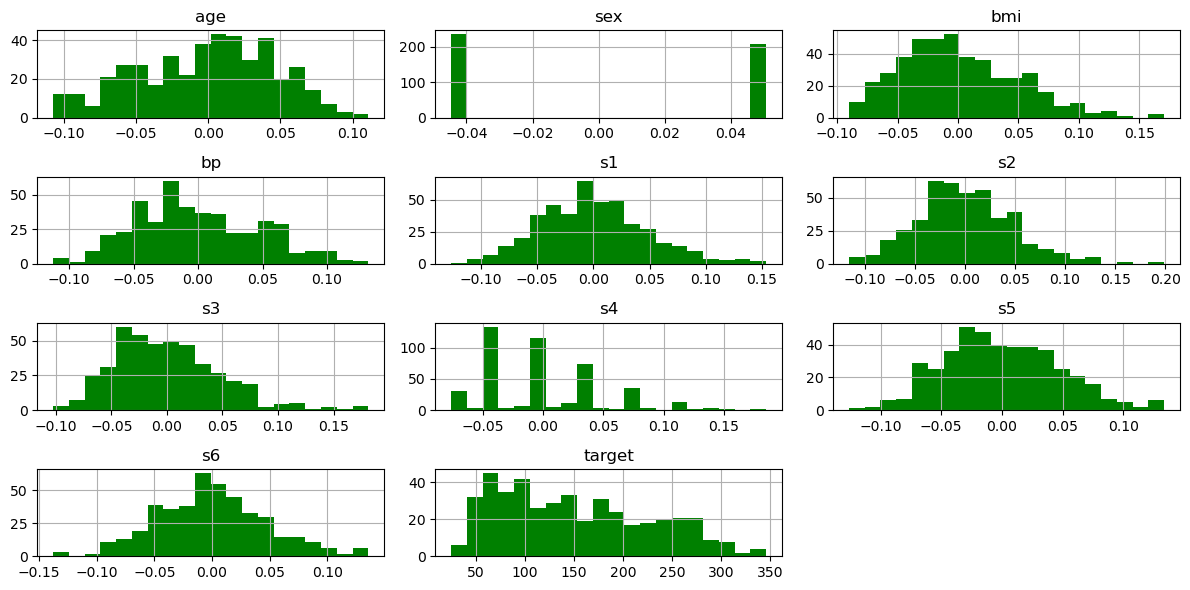

In [7]:
# 히스토그램을 통한 데이터 분포 살펴보기
df.hist(bins=20, figsize=(12, 6), color='green')
plt.tight_layout()
plt.show()

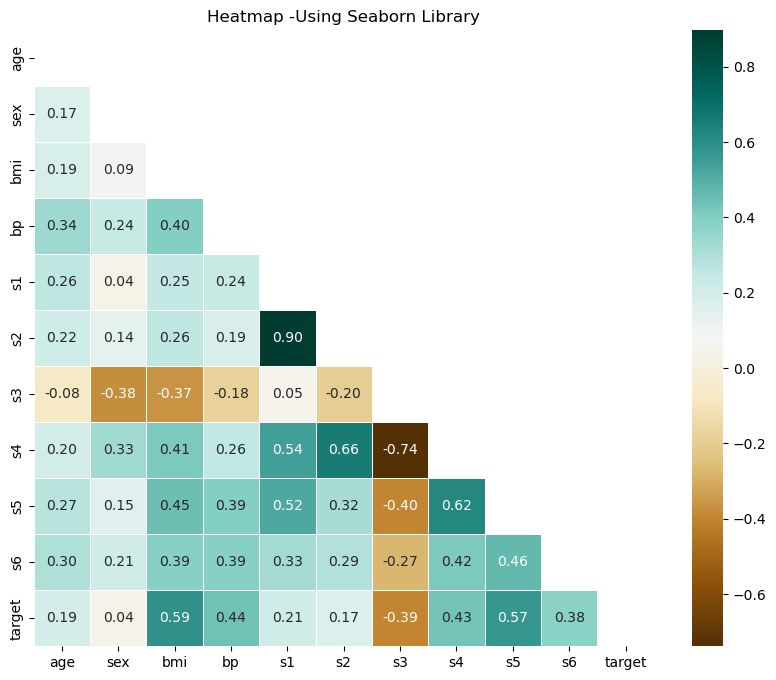

In [8]:
# 특성 간 상관 관계 확인하기 
# 삼각형 형식으로 보여주기
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
sns.heatmap(corr_matrix,annot=True, cmap='BrBG', linewidths=0.5, mask=mask, fmt=".2f")
plt.title("Heatmap -Using Seaborn Library")
plt.show()

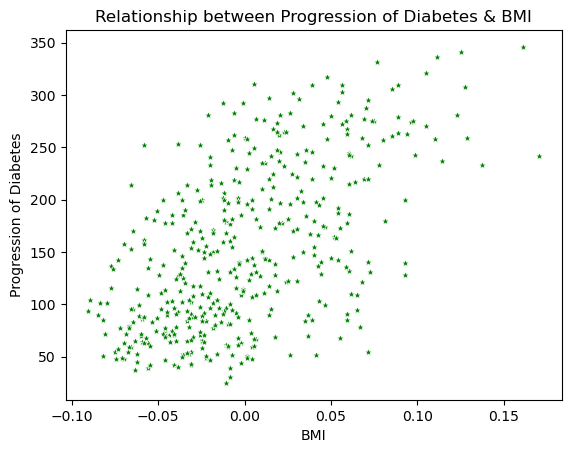

In [9]:
# 종속변수와 독립변수 관계 
sns.scatterplot(x='bmi', y='target', data=df, color='green', marker='*')
plt.xlabel("BMI")
plt.ylabel("Progression of Diabetes") # 당뇨병 진행 정도
plt.title("Relationship between Progression of Diabetes & BMI")
plt.show()

In [10]:
# Diabetes(당뇨병) 데이터셋 로드
diabetes = load_diabetes()
X = df.bmi.values
y = df.target.values

# 단순선형회귀 모델 선언
model = LinearRegression()
# 1차원 -> 2차원 변경
X = X.reshape(-1, 1)
# 모델 학습. FIT 을 사용합니다.
model.fit(X, y)


# 회귀식: y= 152.133 + 949.435*x 이 되겠습니다.
# coef 가 기울기를, intercept_가 Y 절편을 의미합니다. 
model.coef_[0], model.intercept_

(949.4352603840388, 152.13348416289617)

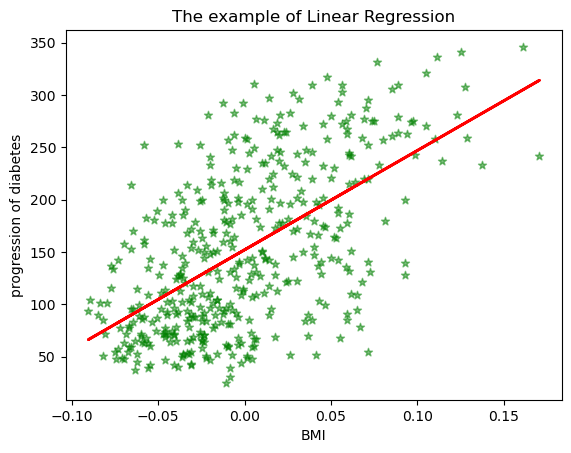

In [11]:
# 회귀선 추가하기 
plt.scatter(X, y, alpha=0.5, color='green', marker='*')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel("BMI")
plt.ylabel("progression of diabetes") # 당뇨병 진행 정도
plt.title("The example of Linear Regression")
plt.show()

In [12]:
# 회귀분석 결과 해석하기 
# 주요 해석포인트 
# 결정계수 R-squared 확인, 모형의 적합도 Prob(F-statistic) 확인, P>|t| 확인
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()
results.summary()

# 메시지 Standard Errors assume that the covariance matrix of the errors is correctly specified.
# 메시지 해석 데이터 관측치의 부족으로 첨도 테스트에 문제가 있다는 경고(common notice 정도로 이해해주세요)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           3.47e-42
Time:                        22:52:36   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
x1           949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A. R제곱<br>
값이 0.34정도로 이는 34%만큼의 설명력을 가진다고 판단할 수 있습니다. <br>
0에 가까울 수록 예측값을 믿을 수 없고 1에 가까울 수록 믿을 수 있다고 판단합니다.<br>
----------------------------

B. Prob(F-statistic)<br>
도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악합니다.<br>
-> F-statistic의 p-value 값은 Prob(F-statistic)으로 표현되는데,<br>
이는 3.47e-42로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있습니다.<br>
    
----------------------------
C. P>|t| <br>
각 변수가 종속변수에 미치는 영향이 유의한지 파악합니다.<br>
x1과 const에 대한 p-value가 0.000으로 표기 되어 있기에 0.05보다 작으므로 target을 설명하는데 유의하다고 볼 수 있습니다. <br>
<br>


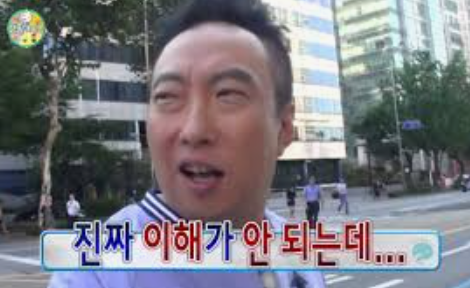

In [13]:
Image.open('이해명수.png')